In [1]:
##importing a packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##instaling geopandas and plotly.plotly
!conda update -n base conda --yes
!conda install fiona pyproj six --yes
!conda install geopandas --yes
!conda install fiona=1.6 --yes
!conda install -c https://conda.anaconda.org/plotly plotly --yes

In [2]:
##importing data  
import geopandas as gpd
import plotly.plotly as py

In [3]:
##importing data
data2015_df = pd.read_csv('2015.csv')
data2016_df = pd.read_csv('2016.csv')
data2017_df = pd.read_csv('2017.csv')

In [4]:
##inspecting data
data2015_df.info()
data2016_df.info()
data2017_df.info()

data2015_df.head()
data2016_df.head()
data2017_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                        

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
##adding yer to data
data2015_df['Year'] = 2015
data2016_df['Year'] = 2016
data2017_df['Year'] = 2017

In [6]:
##inspecting data
data2015_df.info()
data2016_df.info()
data2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
Year                             158 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 16.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
Country                        

In [7]:
##adding region to data from 2017 year
##merging data
data_merg = pd.merge(data2015_df, data2016_df, how = 'outer', on = 'Country')

In [8]:
##inspecting data
data_merg.info()
data_merg.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 26 columns):
Country                            164 non-null object
Region_x                           158 non-null object
Happiness Rank_x                   158 non-null float64
Happiness Score_x                  158 non-null float64
Standard Error                     158 non-null float64
Economy (GDP per Capita)_x         158 non-null float64
Family_x                           158 non-null float64
Health (Life Expectancy)_x         158 non-null float64
Freedom_x                          158 non-null float64
Trust (Government Corruption)_x    158 non-null float64
Generosity_x                       158 non-null float64
Dystopia Residual_x                158 non-null float64
Year_x                             158 non-null float64
Region_y                           157 non-null object
Happiness Rank_y                   157 non-null float64
Happiness Score_y                  157 non-null float64
Lo

,Country,Region_x,Happiness Rank_x,Happiness Score_x,Standard Error,Economy (GDP per Capita)_x,Family_x,Health (Life Expectancy)_x,Freedom_x,Trust (Government Corruption)_x,...,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita)_y,Family_y,Health (Life Expectancy)_y,Freedom_y,Trust (Government Corruption)_y,Generosity_y,Dystopia Residual_y,Year_y
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016.0
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016.0
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016.0
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016.0
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,2016.0


In [9]:
##filling empty values with other variable
data_merg = data_merg[['Country', 'Region_x', 'Region_y']] ##merging data with 'merg' method 
data_merg.Region_x.fillna(data_merg.Region_y, inplace=True) ##filling empty spaces with another variable
del data_merg['Region_y'] ##deleting column
data_merg.columns = 'Country Region'.split() ##splitting columns

In [10]:
##inspecting data
data_merg.info()
data_merg.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 2 columns):
Country    164 non-null object
Region     164 non-null object
dtypes: object(2)
memory usage: 3.8+ KB


,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [11]:
data2017_df_reg = pd.merge(data2017_df, data_merg, how = 'inner', on = 'Country') ##merging data

In [12]:
##inspecting data
data2017_df_reg.info()
data2017_df_reg.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 14 columns):
Country                          153 non-null object
Happiness.Rank                   153 non-null int64
Happiness.Score                  153 non-null float64
Whisker.high                     153 non-null float64
Whisker.low                      153 non-null float64
Economy..GDP.per.Capita.         153 non-null float64
Family                           153 non-null float64
Health..Life.Expectancy.         153 non-null float64
Freedom                          153 non-null float64
Generosity                       153 non-null float64
Trust..Government.Corruption.    153 non-null float64
Dystopia.Residual                153 non-null float64
Year                             153 non-null int64
Region                           153 non-null object
dtypes: float64(10), int64(2), object(2)
memory usage: 17.9+ KB


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,Western Europe


In [13]:
##merging all data together - country
data2015_df_country = data2015_df.set_index('Country') ##changing index in data frame
del data2015_df_country['Standard Error'] ##deleting column

data2016_df_country = data2016_df.set_index('Country') ##changing index in data frame 
del data2016_df_country['Lower Confidence Interval']  ##deleting column
del data2016_df_country['Upper Confidence Interval']  ##deleting column
del data2016_df_country['Region']  ##deleting column

data2017_df_country = data2017_df_reg.set_index('Country') ##changing index in data frame
del data2017_df_country['Whisker.high']  ##deleting column
del data2017_df_country['Whisker.low']  ##deleting column
del data2017_df_country['Region']  ##deleting column
##changing columns name and positions in data frame
data2017_df_country = data2017_df_country.rename(columns={data2017_df_country.columns[0]: 'Happiness Rank',
                                               data2017_df_country.columns[1]: 'Happiness Score',
                                               data2017_df_country.columns[2]: 'Economy (GDP per Capita)',
                                               data2017_df_country.columns[4]: 'Health (Life Expectancy)',
                                               data2017_df_country.columns[7]: 'Trust (Government Corruption)',
                                               data2017_df_country.columns[8]: 'Dystopia Residual'})
data2017_df_country = data2017_df_country[['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                                'Generosity', 'Dystopia Residual', 'Year']]

In [14]:
##inspecting data
data2015_df_country.info()
data2016_df_country.info()
data2017_df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
Year                             158 non-null int64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Denmark to Burundi
Data columns (total 10 columns):
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Economy (GDP per Capi

In [15]:
##merging data with 'concat' method 
data_all_country = pd.concat([data2015_df_country, data2016_df_country, data2017_df_country], axis = 1, join = 'inner')
data_all_region = pd.concat([data2015_df_country, data2016_df_country, data2017_df_country], axis = 1, join = 'inner')

In [16]:
##inspecting data
data_all_country.info()
data_all_country.head()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, Switzerland to Togo
Data columns (total 31 columns):
Region                           146 non-null object
Happiness Rank                   146 non-null int64
Happiness Score                  146 non-null float64
Economy (GDP per Capita)         146 non-null float64
Family                           146 non-null float64
Health (Life Expectancy)         146 non-null float64
Freedom                          146 non-null float64
Trust (Government Corruption)    146 non-null float64
Generosity                       146 non-null float64
Dystopia Residual                146 non-null float64
Year                             146 non-null int64
Happiness Rank                   146 non-null int64
Happiness Score                  146 non-null float64
Economy (GDP per Capita)         146 non-null float64
Family                           146 non-null float64
Health (Life Expectancy)         146 non-null float64
Freedom                         

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Country,,,,,,,,,,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2.187264,2017


In [17]:
##average per country plus sorting and rounding
del data_all_country['Year']
del data_all_country['Region']

In [18]:
data_all_sumc = data_all_country.sum(level=0, axis=1) ##sum up data from three years per country
data_all_divc = data_all_sumc.div(3) ##divide those data by 3 (mean)

In [19]:
data_all_divc = data_all_divc.round(4) ##rounding data
data_avg_country = data_all_divc.sort_values(by = 'Happiness Score', ascending = False) ##sorting data

In [20]:
data_avg_country['Nr'] = np.arange(len(data_avg_country)) ##counting all rows
data_avg_country['Nr'] = data_avg_country['Nr'] + 1 ##counting all rows starts from one
data_avg_country['x'] = '.' ##creating an auxiliary variable
data_avg_country['y'] = '|' ##creating an auxiliary variable
data_avg_country.reset_index(level=0, inplace=True) ##resetting index
##copying variable and changing type of it
data_avg_country['Happiness Score new'] = data_avg_country['Happiness Score'].apply(str)
data_avg_country['Nr'] = data_avg_country['Nr'].apply(str) ##changing type of variable
##creating new variable from few other
data_avg_country['Country'] = data_avg_country['Nr'] + data_avg_country['x'] + data_avg_country['Country'] + data_avg_country['y'] + data_avg_country['Happiness Score new']
data_avg_country = data_avg_country.set_index('Country') ##changing index in data frame
data_avg_country = data_avg_country.sort_values(by = 'Happiness Score', ascending = True) ##sorting data

In [21]:
##inspecting data
data_avg_country.info()
data_avg_country.head()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 146.Burundi|2.905 to 1.Switzerland|7.53
Data columns (total 13 columns):
Happiness Rank                   146 non-null float64
Happiness Score                  146 non-null float64
Economy (GDP per Capita)         146 non-null float64
Family                           146 non-null float64
Health (Life Expectancy)         146 non-null float64
Freedom                          146 non-null float64
Trust (Government Corruption)    146 non-null float64
Generosity                       146 non-null float64
Dystopia Residual                146 non-null float64
Nr                               146 non-null object
x                                146 non-null object
y                                146 non-null object
Happiness Score new              146 non-null object
dtypes: float64(9), object(4)
memory usage: 16.0+ KB


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Nr,x,y,Happiness Score new
Country,,,,,,,,,,,,,
146.Burundi|2.905,156.0000,2.9050,0.0584,0.4267,0.1777,0.0739,0.0930,0.2015,1.8734,146,.,|,2.905
145.Syria|3.179,154.6667,3.1790,0.7292,0.3399,0.6175,0.1025,0.1709,0.4831,0.7360,145,.,|,3.179
144.Togo|3.2123,154.3333,3.2123,0.2651,0.1906,0.2599,0.3639,0.1063,0.1796,1.8466,144,.,|,3.2123
143.Rwanda|3.4837,152.3333,3.4837,0.3064,0.7784,0.3579,0.5724,0.5041,0.2382,0.7262,143,.,|,3.4837
142.Benin|3.4937,150.3333,3.4937,0.3709,0.2978,0.2464,0.4360,0.0693,0.1974,1.8757,142,.,|,3.4937


In [22]:
##average per region plus sorting and rounding
data_all_regionidx = data_all_region.set_index('Region') ##changing index in data frame
del data_all_regionidx['Year'] ##deleting column

In [23]:
data_all_sumr = data_all_regionidx.sum(level=0, axis=1) ##sum up data from three years per region
data_all_divr = data_all_sumr.div(3) ##divide those data by 3 (mean)
data_all_bpr = data_all_divr[['Happiness Score']]
data_all_divr.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,
Western Europe,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.399606,0.289386,2.496242
Western Europe,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.148242,0.462873,2.618698
Western Europe,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.442957,0.352793,2.515046
Western Europe,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.346251,0.362651,2.468996
North America,6.000000,7.382333,1.415215,1.300020,0.855929,0.605924,0.310077,0.447330,2.447958


In [24]:
data_all_divr = data_all_divr.groupby(['Region']).mean() ##counting the average in groups
data_all_divr = data_all_divr.round(4) ##rounding data
data_avg_region = data_all_divr.sort_values(by = 'Happiness Score', ascending = False) ##sorting data

In [25]:
data_avg_region['Nr'] = np.arange(len(data_avg_region)) ##counting all rows
data_avg_region['Nr'] = data_avg_region['Nr'] + 1 ##counting all rows starts from one
data_avg_region['x'] = '.' ##creating an auxiliary variable
data_avg_region['y'] = '|' ##creating an auxiliary variable
data_avg_region.reset_index(level=0, inplace=True) ##resetting index
##copying variable and changing type of it
data_avg_region['Happiness Score new'] = data_avg_region['Happiness Score'].apply(str)
data_avg_region['Nr'] = data_avg_region['Nr'].apply(str) ##changing type of variable
##creating new variable from few other
data_avg_region['Region'] = data_avg_region['Nr'] + data_avg_region['x'] + data_avg_region['Region'] + data_avg_region['y'] + data_avg_region['Happiness Score new']
data_avg_region = data_avg_region.set_index('Region') ##changing index in data frame

In [26]:
data_avg_region = data_avg_region.sort_values(by = 'Happiness Score', ascending = True) ##sorting data
data_avg_region

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Nr,x,y,Happiness Score new
Region,,,,,,,,,,,,,
10.Sub-Saharan Africa|4.1075,130.3838,4.1075,0.4717,0.8038,0.2597,0.3396,0.1034,0.2224,1.9070,10,.,|,4.1075
9.Southern Asia|4.5909,111.5714,4.5909,0.6395,0.6860,0.4837,0.3741,0.1035,0.3421,1.9619,9,.,|,4.5909
8.Middle East and Northern Africa|5.3622,78.3509,5.3622,1.1198,0.9011,0.6417,0.3403,0.1616,0.1917,2.0061,8,.,|,5.3622
7.Central and Eastern Europe|5.3712,77.5057,5.3712,1.0273,1.0657,0.6622,0.3351,0.0848,0.1698,2.0263,7,.,|,5.3712
6.Southeastern Asia|5.4048,76.6667,5.4048,0.9008,1.0126,0.6197,0.5245,0.1354,0.4390,1.7729,6,.,|,5.4048
5.Eastern Asia|5.4899,71.3333,5.4899,1.1597,1.1122,0.7984,0.4109,0.0770,0.1739,1.7579,5,.,|,5.4899
4.Latin America and Caribbean|6.0509,49.3968,6.0509,0.9532,1.1056,0.6481,0.4526,0.1026,0.2126,2.5763,4,.,|,6.0509
3.Western Europe|6.693,28.6190,6.6930,1.3910,1.2449,0.8532,0.5142,0.2277,0.3034,2.1586,3,.,|,6.693
2.North America|7.2272,10.0000,7.2272,1.4491,1.2692,0.8305,0.5585,0.2289,0.4244,2.4667,2,.,|,7.2272


In [27]:
##inspecting data
data_avg_region.info()
data_avg_region

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 10.Sub-Saharan Africa|4.1075 to 1.Australia and New Zealand|7.3025
Data columns (total 13 columns):
Happiness Rank                   10 non-null float64
Happiness Score                  10 non-null float64
Economy (GDP per Capita)         10 non-null float64
Family                           10 non-null float64
Health (Life Expectancy)         10 non-null float64
Freedom                          10 non-null float64
Trust (Government Corruption)    10 non-null float64
Generosity                       10 non-null float64
Dystopia Residual                10 non-null float64
Nr                               10 non-null object
x                                10 non-null object
y                                10 non-null object
Happiness Score new              10 non-null object
dtypes: float64(9), object(4)
memory usage: 1.1+ KB


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Nr,x,y,Happiness Score new
Region,,,,,,,,,,,,,
10.Sub-Saharan Africa|4.1075,130.3838,4.1075,0.4717,0.8038,0.2597,0.3396,0.1034,0.2224,1.9070,10,.,|,4.1075
9.Southern Asia|4.5909,111.5714,4.5909,0.6395,0.6860,0.4837,0.3741,0.1035,0.3421,1.9619,9,.,|,4.5909
8.Middle East and Northern Africa|5.3622,78.3509,5.3622,1.1198,0.9011,0.6417,0.3403,0.1616,0.1917,2.0061,8,.,|,5.3622
7.Central and Eastern Europe|5.3712,77.5057,5.3712,1.0273,1.0657,0.6622,0.3351,0.0848,0.1698,2.0263,7,.,|,5.3712
6.Southeastern Asia|5.4048,76.6667,5.4048,0.9008,1.0126,0.6197,0.5245,0.1354,0.4390,1.7729,6,.,|,5.4048
5.Eastern Asia|5.4899,71.3333,5.4899,1.1597,1.1122,0.7984,0.4109,0.0770,0.1739,1.7579,5,.,|,5.4899
4.Latin America and Caribbean|6.0509,49.3968,6.0509,0.9532,1.1056,0.6481,0.4526,0.1026,0.2126,2.5763,4,.,|,6.0509
3.Western Europe|6.693,28.6190,6.6930,1.3910,1.2449,0.8532,0.5142,0.2277,0.3034,2.1586,3,.,|,6.693
2.North America|7.2272,10.0000,7.2272,1.4491,1.2692,0.8305,0.5585,0.2289,0.4244,2.4667,2,.,|,7.2272


In [28]:
##correlation matrix with 'corr' function
data_corr = data_avg_country.drop(data_avg_country.columns[[0]], axis=1)
corr = data_corr.corr()
corr

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.811304,0.757383,0.779297,0.588093,0.441996,0.177976,0.553066
Economy (GDP per Capita),0.811304,1.000000,0.664216,0.824844,0.393691,0.374687,-0.009311,0.122103
Family,0.757383,0.664216,1.000000,0.569142,0.485206,0.252293,0.096674,0.178165
Health (Life Expectancy),0.779297,0.824844,0.569142,1.000000,0.380742,0.294367,0.081552,0.158181
Freedom,0.588093,0.393691,0.485206,0.380742,1.000000,0.508953,0.368460,0.088529
Trust (Government Corruption),0.441996,0.374687,0.252293,0.294367,0.508953,1.000000,0.271939,-0.004608
Generosity,0.177976,-0.009311,0.096674,0.081552,0.368460,0.271939,1.000000,-0.108873
Dystopia Residual,0.553066,0.122103,0.178165,0.158181,0.088529,-0.004608,-0.108873,1.000000


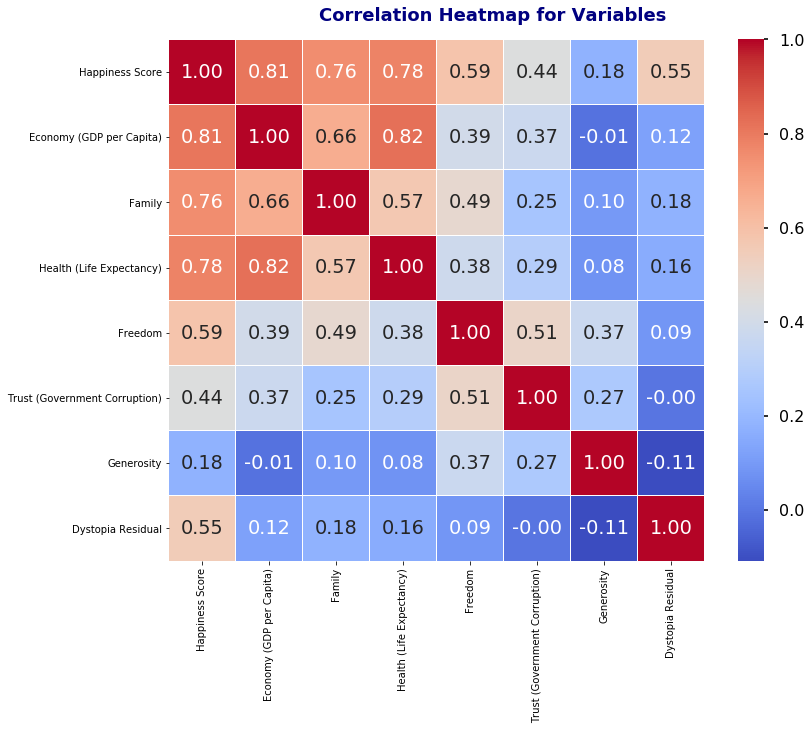

In [29]:
##correlation heatmap with 'heatmap' method
matplotlib.get_backend()
fig, (ax) = plt.subplots(1, 1, figsize=(12,9))
sns.set_context("poster")

hm = sns.heatmap(corr, 
                 ax=ax,         
                 cmap="coolwarm", 
                 annot=True, 
                 fmt='.2f',       
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
title_obj = fig.suptitle('Correlation Heatmap for Variables', 
              fontsize=18, 
              fontweight='bold')
plt.setp(title_obj, color='navy')
plt.show()

##saving plot with optimal size
figure = hm.get_figure()    
figure.savefig('correlation_heatmap.png', dpi=900, bbox_inches='tight')

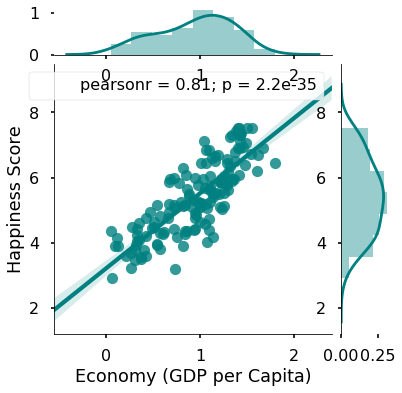

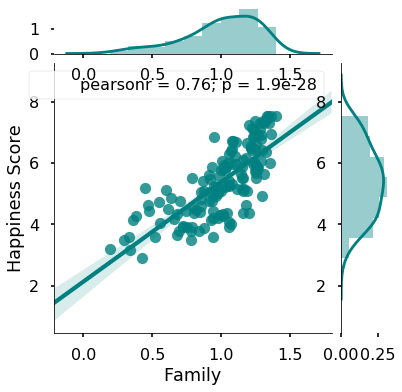

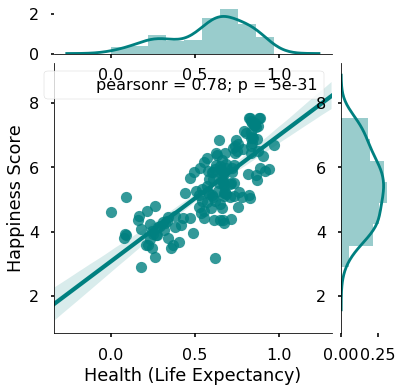

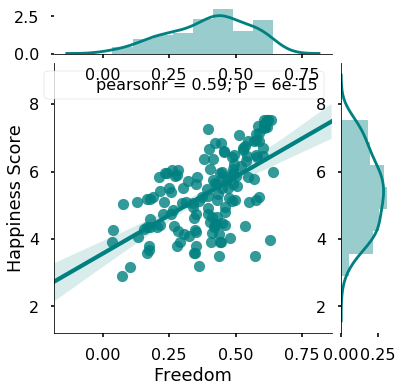

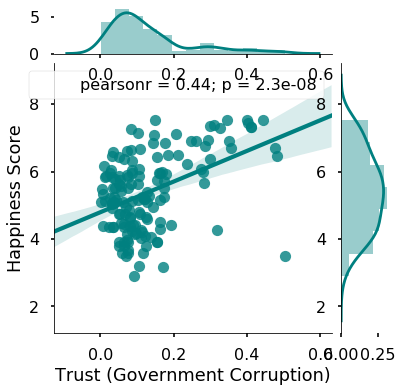

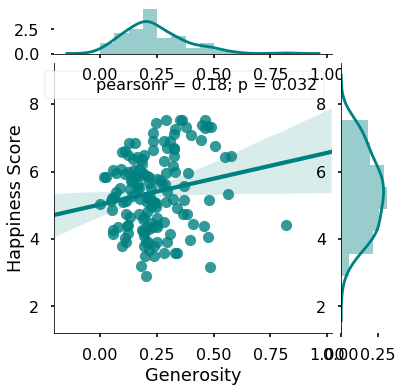

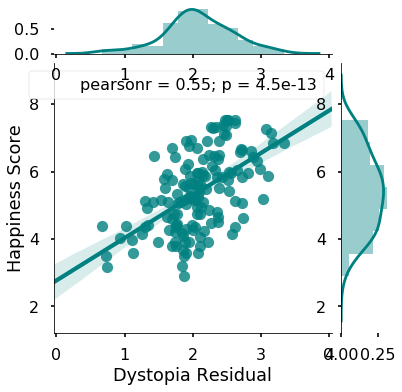

In [30]:
##jointplots with histograms and linear relation with happiness score
jp1 = sns.jointplot('Economy (GDP per Capita)', 'Happiness Score', data=data_avg_country, kind='reg', color='teal')
jp2 = sns.jointplot('Family', 'Happiness Score', data=data_avg_country, kind='reg', color='teal')
jp3 = sns.jointplot('Health (Life Expectancy)', 'Happiness Score', data=data_avg_country, kind='reg', color='teal')
jp4 = sns.jointplot('Freedom', 'Happiness Score', data=data_avg_country, kind='reg', color='teal')
jp5 = sns.jointplot('Trust (Government Corruption)', 'Happiness Score', data=data_avg_country, kind='reg', color='teal')
jp6 = sns.jointplot('Generosity', 'Happiness Score', data=data_avg_country, kind='reg', color='teal')
jp7 = sns.jointplot('Dystopia Residual', 'Happiness Score', data=data_avg_country, kind='reg', color='teal')

##saving plots with optimal size  
jp1.savefig('jp1.png', dpi=450, bbox_inches='tight')
jp2.savefig('jp2.png', dpi=450, bbox_inches='tight')
jp3.savefig('jp3.png', dpi=450, bbox_inches='tight')
jp4.savefig('jp4.png', dpi=450, bbox_inches='tight')
jp5.savefig('jp5.png', dpi=450, bbox_inches='tight')
jp6.savefig('jp6.png', dpi=450, bbox_inches='tight')
jp7.savefig('jp7.png', dpi=450, bbox_inches='tight')

In [31]:
##data for dynamics plot - country  
data_dyn2016c = data2016_df[['Country', 'Happiness Score']] ##new data frame  
  
data_dyn2017c = data2017_df[['Country', 'Happiness.Score']] ##new data frame  
data_dyn2017c = data_dyn2017c.rename(columns={data_dyn2017c.columns[1]: 'Happiness Score'}) ##renaming columns  

In [32]:
##inspecting data
data_dyn2016c.info()
data_dyn2017c.info()

data_dyn2016c.head()
data_dyn2017c.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
Country            157 non-null object
Happiness Score    157 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
Country            155 non-null object
Happiness Score    155 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


,Country,Happiness Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469


In [33]:
##merging data with 'merg' method
data_dyn1716c = pd.merge(data_dyn2017c, data_dyn2016c, how = 'inner', on = 'Country')
data_dyn1716c.head()

,Country,Happiness Score_x,Happiness Score_y
0,Norway,7.537,7.498
1,Denmark,7.522,7.526
2,Iceland,7.504,7.501
3,Switzerland,7.494,7.509
4,Finland,7.469,7.413


In [37]:
data_dyn1716c['Dynamics'] = data_dyn1716c['Happiness Score_x'] - data_dyn1716c['Happiness Score_y'] ##counting dynamics  
data_dyn_country = data_dyn1716c[['Country', 'Dynamics']] ##new data frame  
data_dyn_country = data_dyn_country.sort_values(by = 'Dynamics', ascending = False) ##sorting  
data_dyn_country['Nr'] = np.arange(len(data_dyn_country)) ##counting all rows  
data_dyn_country['Nr'] = data_dyn_country['Nr'] + 1 ##counting all rows starts from one  
data_dyn_country['x'] = '.' ##creating an auxiliary variable  
data_dyn_country['Nr'] = data_dyn_country['Nr'].apply(str) ##changing type of variable  
##creating new variable from few other  
data_dyn_country['Country'] = data_dyn_country['Nr'] + data_dyn_country['x'] + data_dyn_country['Country'] 

In [38]:
##inspecting data
data_dyn_country.info()
data_dyn_country.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 102 to 79
Data columns (total 4 columns):
Country     150 non-null object
Dynamics    150 non-null float64
Nr          150 non-null object
x           150 non-null object
dtypes: float64(1), object(3)
memory usage: 5.9+ KB


,Country,Dynamics,Nr,x
102,1.Bulgaria,0.497,1,.
136,2.Afghanistan,0.434,2,.
147,3.Syria,0.393,3,.
101,4.Egypt,0.373,4,.
98,5.South Africa,0.370,5,.


In [43]:
##data for dynamics plot - region  
data_dyn2016r = data2016_df[['Country', 'Region', 'Happiness Score']] ##new data frame  
  
data_dyn2017 = data2017_df[['Country', 'Happiness.Score']] ##new data frame  
data_dyn2017r = data_dyn2017.rename(columns={data_dyn2017.columns[1]: 'Happiness Score'}) ##renaming columns  

In [44]:
##inspecting data
data_dyn2016r.info()
data_dyn2017r.info()

data_dyn2017r.head()
data_dyn2016r.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
Country            157 non-null object
Region             157 non-null object
Happiness Score    157 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
Country            155 non-null object
Happiness Score    155 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


,Country,Region,Happiness Score
0,Denmark,Western Europe,7.526
1,Switzerland,Western Europe,7.509
2,Iceland,Western Europe,7.501
3,Norway,Western Europe,7.498
4,Finland,Western Europe,7.413


In [45]:
##merging data with 'merge' method  
data_dyn1716r = pd.merge(data_dyn2017r, data_dyn2016r, how = 'inner', on = 'Country')  
data_dyn1716r = data_dyn1716r[['Region', 'Happiness Score_x', 'Happiness Score_y']] ##new data frame  
data_dyn1716r['Dynamics'] = data_dyn1716r['Happiness Score_x'] - data_dyn1716r['Happiness Score_y'] ##counting dynamics  
data_dyn_region = data_dyn1716r[['Region', 'Dynamics']] ##new data frame  
data_dyn_region.head()

,Region,Dynamics
0,Western Europe,0.039
1,Western Europe,-0.004
2,Western Europe,0.003
3,Western Europe,-0.015
4,Western Europe,0.056


In [46]:
data_dyn_region = data_dyn_region.groupby('Region', as_index=False)['Dynamics'].mean() ##counting mean in group  
data_dyn_region = data_dyn_region.round(4) ##rounding data  
data_dyn_region = data_dyn_region.sort_values(by = 'Dynamics', ascending = False) ##sorting data  
data_dyn_region['Nr'] = np.arange(len(data_avg_region)) ##counting all rows  
data_dyn_region['Nr'] = data_dyn_region['Nr'] + 1 ##counting all rows starts from one  
data_dyn_region['x'] = '.' ##creating an auxiliary variable  
data_dyn_region['Nr'] = data_dyn_region['Nr'].apply(str) ##changing type of variable  
##creating new variable from few other  
data_dyn_region['Region'] = data_dyn_region['Nr'] + data_dyn_region['x'] + data_dyn_region['Region']  
data_dyn_region  

,Region,Dynamics,Nr,x
7,1.Southern Asia,0.0651,1,.
6,2.Southeastern Asia,0.0481,2,.
1,3.Central and Eastern Europe,0.0392,3,.
8,4.Sub-Saharan Africa,0.0318,4,.
2,5.Eastern Asia,0.0195,5,.
9,6.Western Europe,0.0180,6,.
4,7.Middle East and Northern Africa,-0.0164,7,.
0,8.Australia and New Zealand,-0.0245,8,.
3,9.Latin America and Caribbean,-0.0937,9,.
5,10.North America,-0.0995,10,.


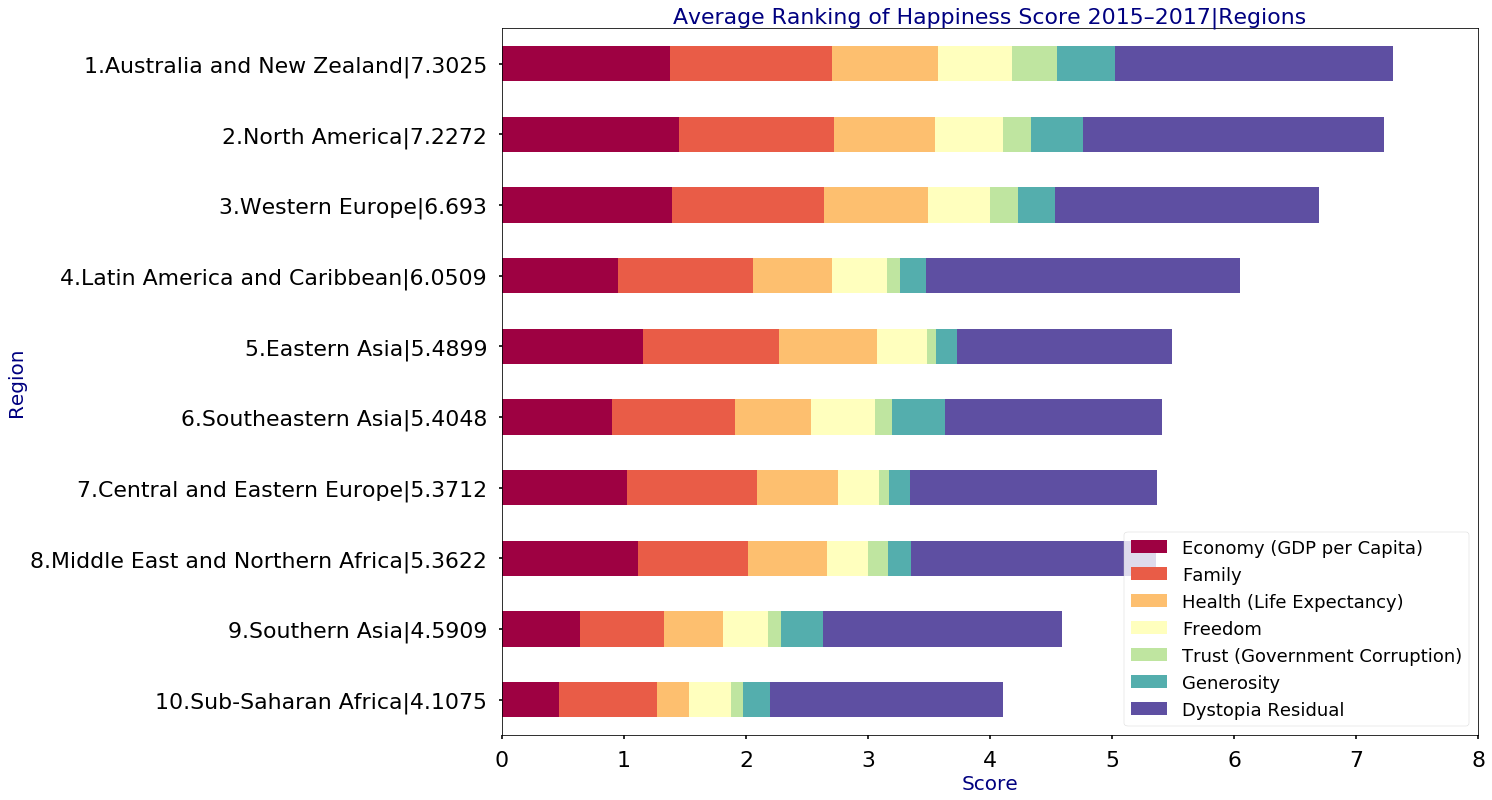

In [47]:
##bar plot with 'plot' method - Region
data_avg_regionbp = data_avg_region[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
                                     'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

bpr = data_avg_regionbp.plot(kind='barh', stacked=True, figsize=(17.5,13), colormap='Spectral', fontsize=22).legend(loc=4, prop={'size':18})
##modifying title and labels  
plt.xlim([0, 8])
title_obj = plt.title('Average Ranking of Happiness Score 2015–2017|Regions', fontsize=22)         
plt.setp(title_obj, color='navy')
x_obj = plt.xlabel('Score', fontsize=20)
plt.setp(x_obj, color='navy')
y_obj = plt.ylabel('Region', fontsize=20)
plt.setp(y_obj, color='navy')

plt.show()

##saving plot
figure = bpr.get_figure()    
figure.savefig('hs_barplot_regions.png', dpi=450, bbox_inches='tight')

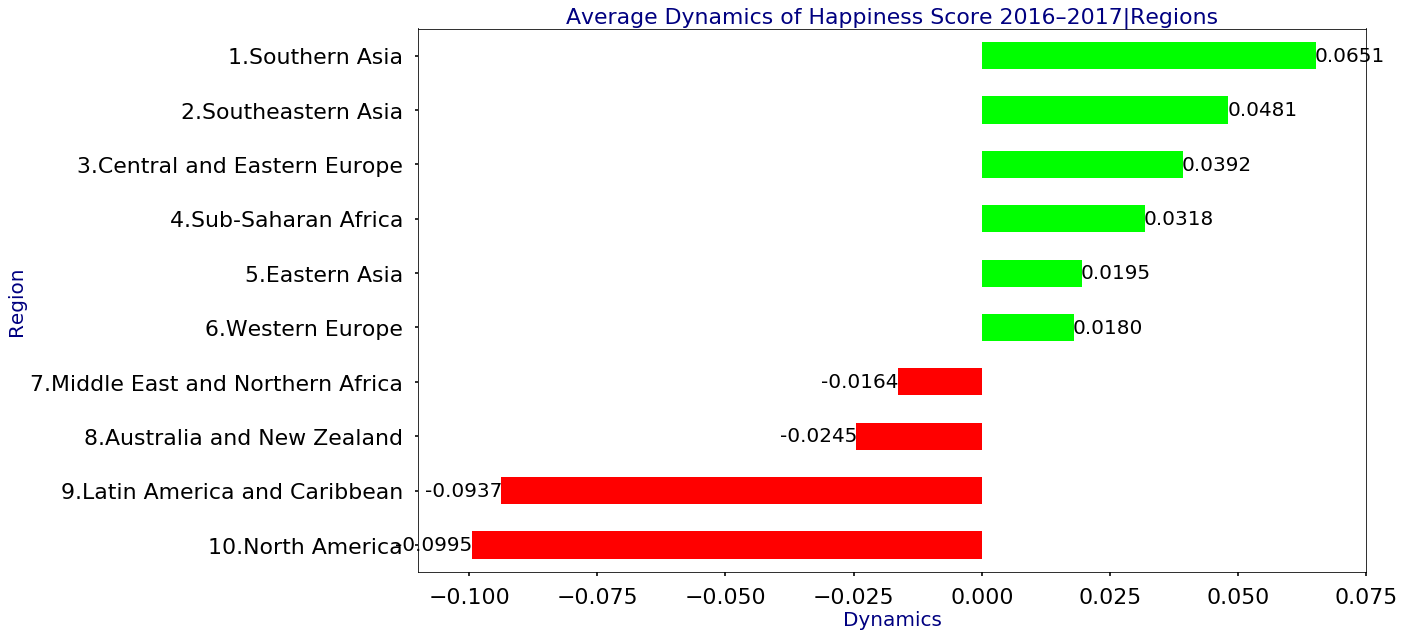

In [48]:
##bar plot with 'plot' method - dynamics per Region  
data_dyn_regionidx = data_dyn_region.set_index('Region') ##changing index in data frame  
data_dyn_regionidx = data_dyn_regionidx.sort_values(by = 'Dynamics', ascending = True) ##sorting data  
##creating difference between minus and plus values  
data_dyn_regionidx['positive'] = data_dyn_regionidx['Dynamics'] > 0  
  
bpdr = data_dyn_regionidx['Dynamics'].plot(kind='barh', figsize=(17,10), fontsize=22, color=data_dyn_regionidx.positive.map({True: 'lime', False: 'red'}))  
##modifying title and labels  
plt.xlim([-0.11, 0.075])  
title_obj = plt.title('Average Dynamics of Happiness Score 2016–2017|Regions', fontsize=22)           
plt.setp(title_obj, color='navy')  
x_obj = plt.xlabel('Dynamics', fontsize=20)  
plt.setp(x_obj, color='navy')  
y_obj = plt.ylabel('Region', fontsize=20)  
plt.setp(y_obj, color='navy')  
##for y, x in enumerate(data_dyn_regionidx['Dynamics']):  
##plt.annotate(str(x), xy=(x, y), ha='center', va='center')  
#plt.show()  
rects = bpdr.patches  
for rect in rects:  
    ##get X and Y placement of label from rect.  
    x_value = rect.get_width()  
    y_value = rect.get_y() + rect.get_height() / 2  
  
    ##number of points between bar and label. Change to your liking.  
    space = -1  
    ##vertical alignment for positive values  
    ha = 'left'  
  
    ##if value of bar is negative: Place label left of bar  
    if x_value < 0:  
        ##invert space to place label to the left  
        space *= -1  
        ##horizontally align label at right  
        ha = 'right'  
  
    ##use X value as label and format number with four decimal place  
    label = "{:.4f}".format(x_value)  
  
    ##create annotation  
    plt.annotate(  
        label,                      ##use `label` as label  
        (x_value, y_value),         ##place label at end of the bar  
        xytext=(space, 0),          ##horizontally shift label by `space`  
        textcoords="offset points", ##interpret `xytext` as offset in points  
        va='center',                ##vertically center label  
        ha=ha,  
        fontsize=20)  
      
plt.show()  
  
##saving plot  
figure = bpdr.get_figure()      
figure.savefig('hs_dynamics_barplot_regions.png', dpi=450, bbox_inches='tight')  

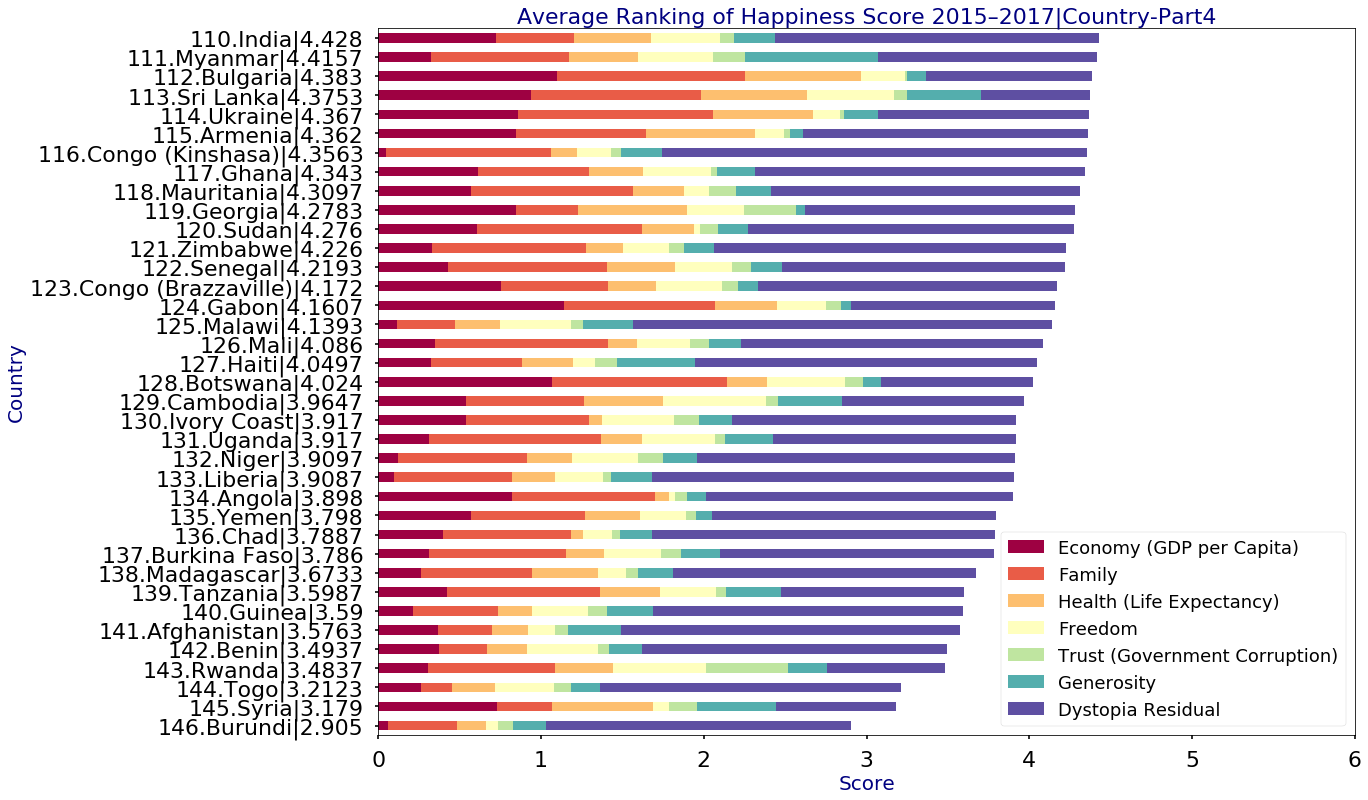

In [49]:
##bar plot with 'plot' method - Country (selected rows)  
##new data frame  
data_avg_countrybp = data_avg_country[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
                      'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

bpc4 = data_avg_countrybp.iloc[0:37].plot(kind='barh', stacked=True, figsize=(17.5,13), colormap='Spectral', fontsize=22).legend(loc=4, prop={'size':18})
##modifying title and labels
plt.xlim([0, 6])
title_obj = plt.title('Average Ranking of Happiness Score 2015–2017|Country-Part4', fontsize=22)         
plt.setp(title_obj, color='navy')
x_obj = plt.xlabel('Score', fontsize=20)
plt.setp(x_obj, color='navy')
y_obj = plt.ylabel('Country', fontsize=20)
plt.setp(y_obj, color='navy')

plt.show()

##saving plot
figure = bpc4.get_figure()    
figure.savefig('hs_barplot_country4.png', dpi=450, bbox_inches='tight')

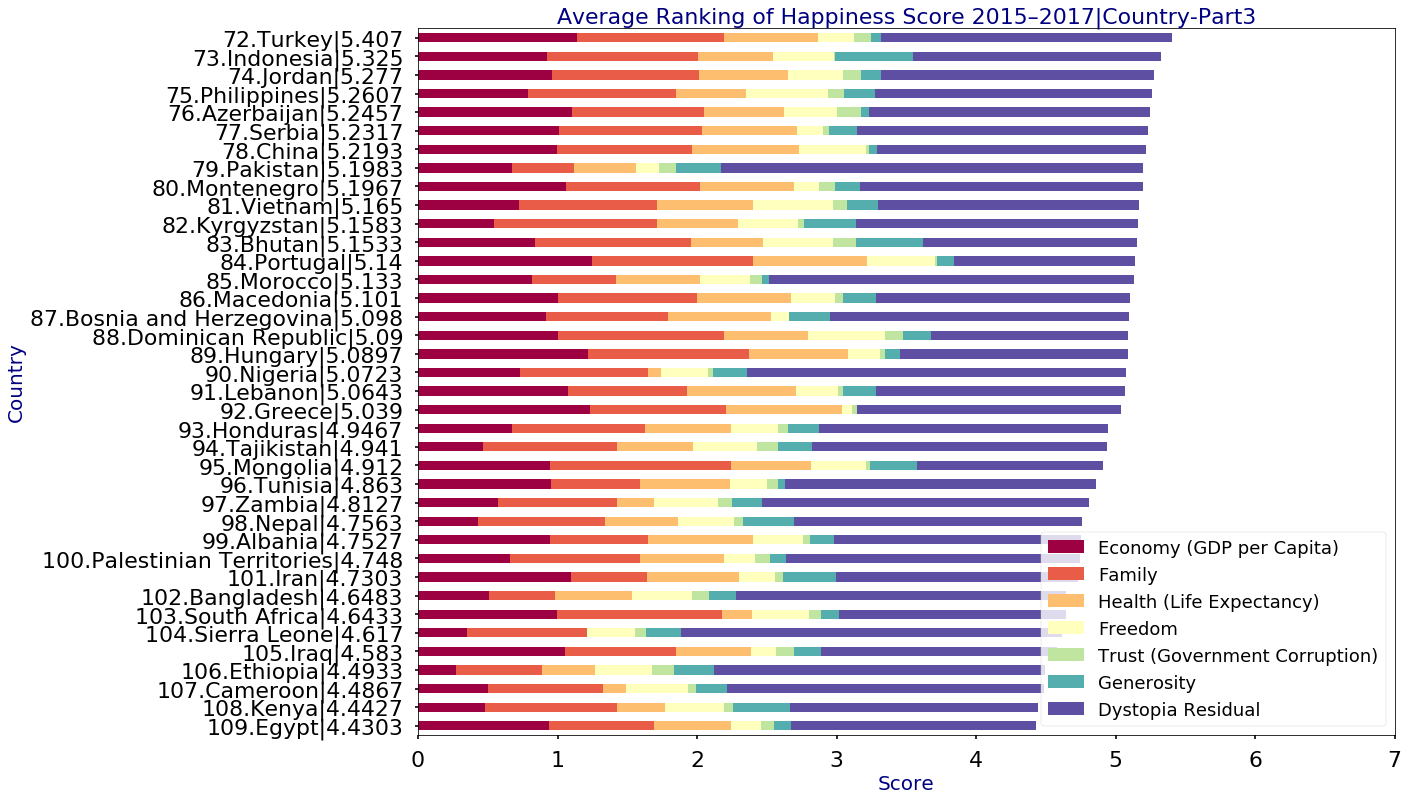

In [50]:
bpc3 = data_avg_countrybp.iloc[37:75].plot(kind='barh', stacked=True, figsize=(17.5,13), colormap='Spectral', fontsize=22).legend(loc=4, prop={'size':18})
##modifying title and labels
plt.xlim([0, 7])
title_obj = plt.title('Average Ranking of Happiness Score 2015–2017|Country-Part3', fontsize=22)         
plt.setp(title_obj, color='navy')
x_obj = plt.xlabel('Score', fontsize=20)
plt.setp(x_obj, color='navy')
y_obj = plt.ylabel('Country', fontsize=20)
plt.setp(y_obj, color='navy')

plt.show()

##saving plot
figure = bpc3.get_figure()    
figure.savefig('hs_barplot_country3.png', dpi=450, bbox_inches='tight')

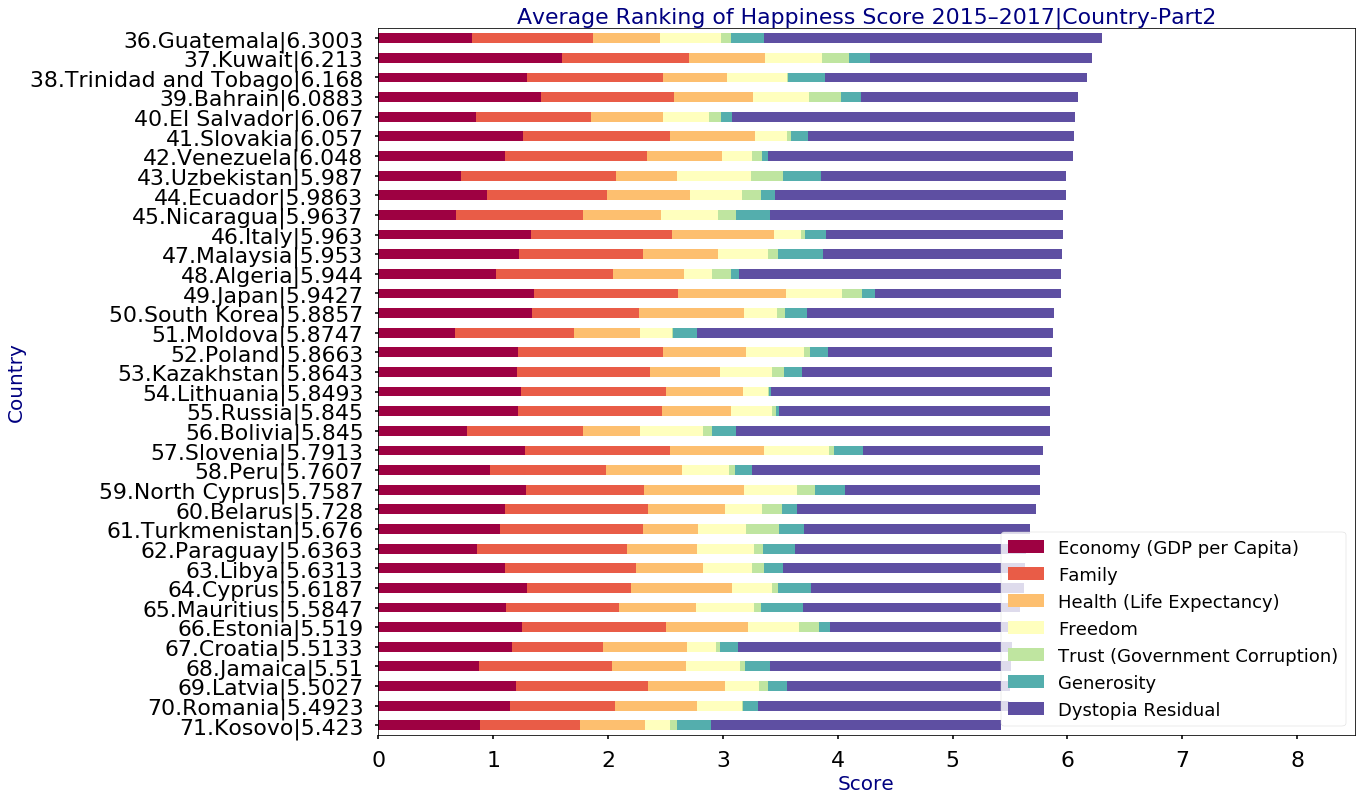

In [51]:
bpc2 = data_avg_countrybp.iloc[75:111].plot(kind='barh', stacked=True, figsize=(17.5,13), colormap='Spectral', fontsize=22).legend(loc=4, prop={'size':18})
##modifying title and labels
plt.xlim([0, 8.5])
title_obj = plt.title('Average Ranking of Happiness Score 2015–2017|Country-Part2', fontsize=22)         
plt.setp(title_obj, color='navy')
x_obj = plt.xlabel('Score', fontsize=20)
plt.setp(x_obj, color='navy')
y_obj = plt.ylabel('Country', fontsize=20)
plt.setp(y_obj, color='navy')

plt.show()

##saving plot
figure = bpc2.get_figure()    
figure.savefig('hs_barplot_country2.png', dpi=450, bbox_inches='tight')

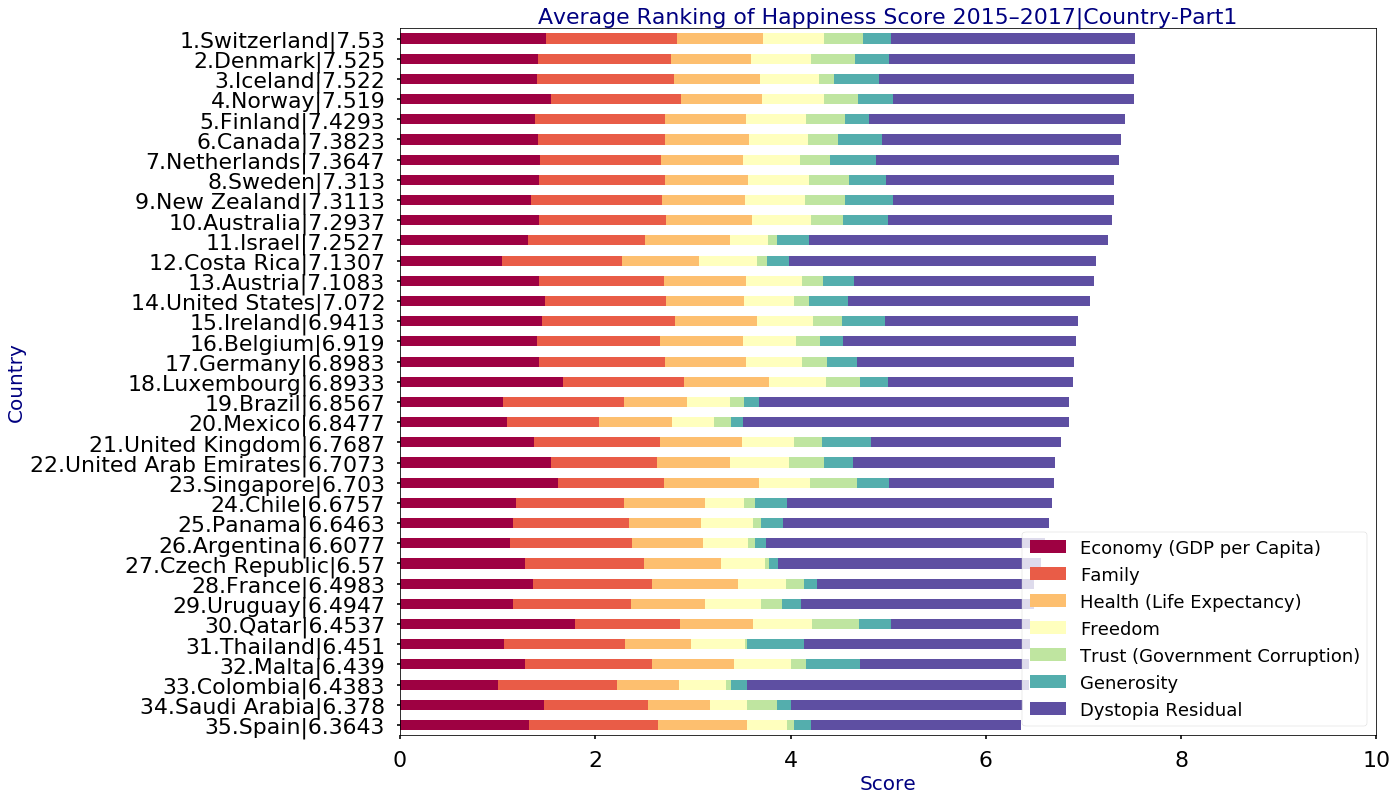

In [52]:
bpc1 = data_avg_countrybp.iloc[111:146].plot(kind='barh', stacked=True, figsize=(17.5,13), colormap='Spectral', fontsize=22).legend(loc=4, prop={'size':18})
##modifying title and labels  
plt.xlim([0, 10])
title_obj = plt.title('Average Ranking of Happiness Score 2015–2017|Country-Part1', fontsize=22)         
plt.setp(title_obj, color='navy')
x_obj = plt.xlabel('Score', fontsize=20)
plt.setp(x_obj, color='navy')
y_obj = plt.ylabel('Country', fontsize=20)
plt.setp(y_obj, color='navy')

plt.show()

##saving plot
figure = bpc1.get_figure()    
figure.savefig('hs_barplot_country1.png', dpi=450, bbox_inches='tight')

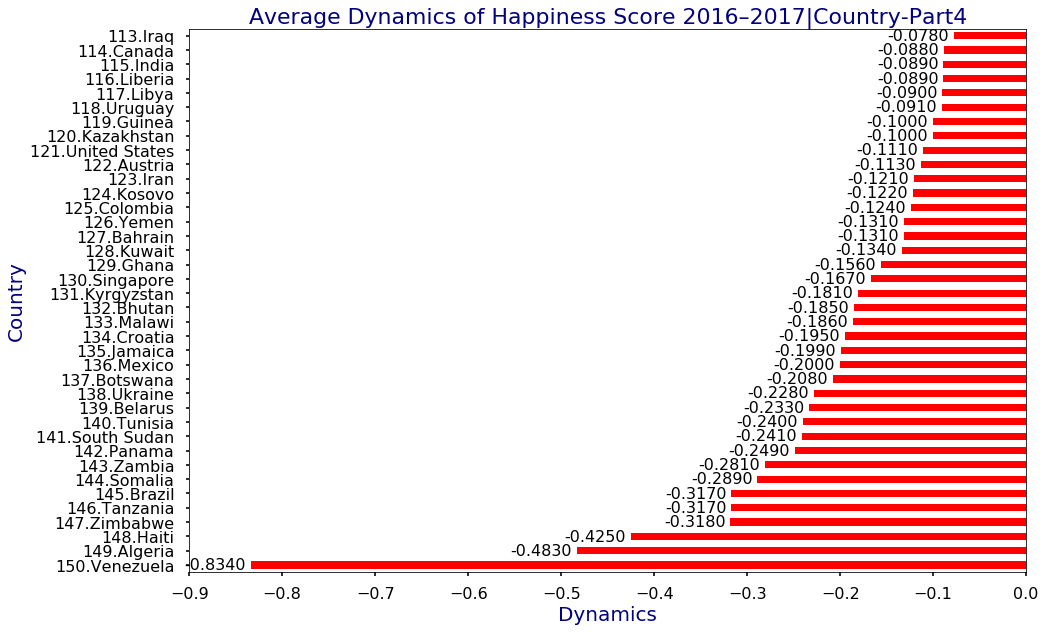

In [53]:
###bar plot with 'plot' method - Country (selected rows)  
data_dyn_countryidx = data_dyn_country.set_index('Country') ##changing index in data frame  
data_dyn_countryidx = data_dyn_countryidx.sort_values(by = 'Dynamics', ascending = True) ##sorting data  
  
bpdc4 = data_dyn_countryidx['Dynamics'].iloc[0:38].plot(kind='barh', figsize=(15,10), fontsize=16, color='red')  
##modifying title and labels  
plt.xlim([-0.9, 0])  
title_obj = plt.title('Average Dynamics of Happiness Score 2016–2017|Country-Part4', fontsize=22)           
plt.setp(title_obj, color='navy')  
x_obj = plt.xlabel('Dynamics', fontsize=20)  
plt.setp(x_obj, color='navy')  
y_obj = plt.ylabel('Country', fontsize=20)  
plt.setp(y_obj, color='navy')  
  
rects = bpdc4.patches  
for rect in rects:  
    ##get X and Y placement of label from rect.  
    x_value = rect.get_width()  
    y_value = rect.get_y() + rect.get_height() / 2  
  
    ##number of points between bar and label. Change to your liking.  
    space = 5  
    ##vertical alignment for positive values  
    ha = 'left'  
  
    ##if value of bar is negative: Place label left of bar  
    if x_value < 0:  
        ##invert space to place label to the left  
        space *= -1  
        ##horizontally align label at right  
        ha = 'right'  
  
    ##use X value as label and format number with four decimal place  
    label = "{:.4f}".format(x_value)  
  
    ##create annotation  
    plt.annotate(  
        label,                      ##use `label` as label  
        (x_value, y_value),         ##place label at end of the bar  
        xytext=(space, 0),          ##horizontally shift label by `space`  
        textcoords="offset points", ##interpret `xytext` as offset in points  
        va='center',                ##vertically center label  
        ha=ha,  
        fontsize=16)  
    
plt.show()  
  
##saving plot  
figure = bpdc4.get_figure()      
figure.savefig('hs_dynamics_barplot_country4.png', dpi=450, bbox_inches='tight')  

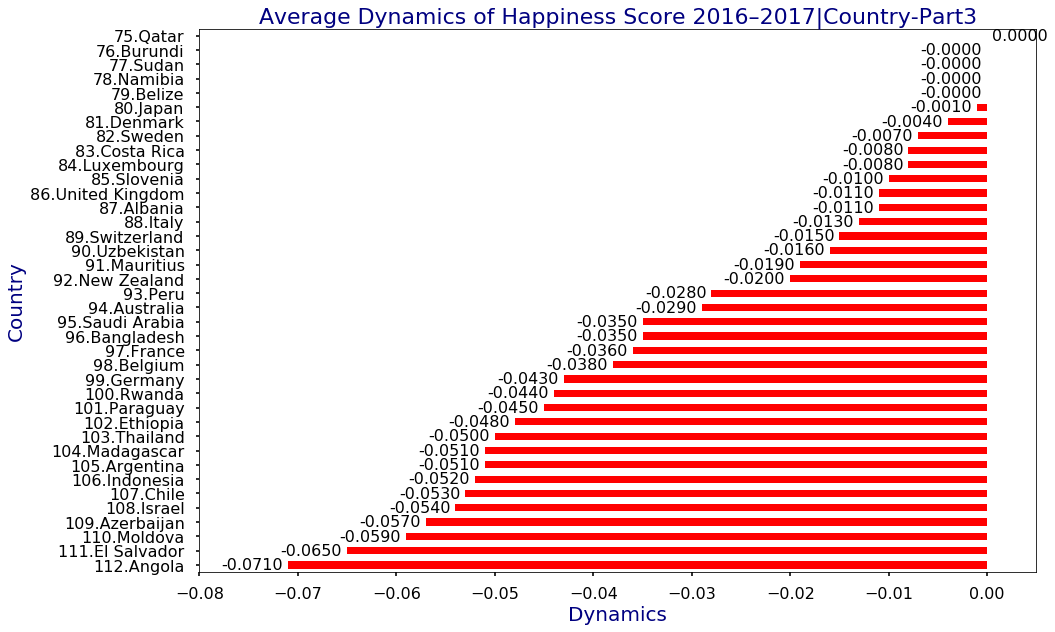

In [54]:
bpdc3 = data_dyn_countryidx['Dynamics'].iloc[38:76].plot(kind='barh', figsize=(15,10), fontsize=16, color='red')  
##modifying title and labels  
plt.xlim([-0.08, 0.005])  
title_obj = plt.title('Average Dynamics of Happiness Score 2016–2017|Country-Part3', fontsize=22)           
plt.setp(title_obj, color='navy')  
x_obj = plt.xlabel('Dynamics', fontsize=20)  
plt.setp(x_obj, color='navy')  
y_obj = plt.ylabel('Country', fontsize=20)  
plt.setp(y_obj, color='navy')  
  
rects = bpdc3.patches  
for rect in rects:  
    ##get X and Y placement of label from rect.  
    x_value = rect.get_width()  
    y_value = rect.get_y() + rect.get_height() / 2  
  
    ##number of points between bar and label. Change to your liking.  
    space = 5  
    ##vertical alignment for positive values  
    ha = 'left'  
  
    ##if value of bar is negative: Place label left of bar  
    if x_value < 0:  
        ##invert space to place label to the left  
        space *= -1  
        ##horizontally align label at right  
        ha = 'right'  
  
    ##use X value as label and format number with four decimal place  
    label = "{:.4f}".format(x_value)  
  
    ##create annotation  
    plt.annotate(  
        label,                      ##use `label` as label  
        (x_value, y_value),         ##place label at end of the bar  
        xytext=(space, 0),          ##horizontally shift label by `space`  
        textcoords="offset points", ##interpret `xytext` as offset in points  
        va='center',                ##vertically center label  
        ha=ha,  
        fontsize=16)  
      
plt.show()  
  
##saving plot  
figure = bpdc3.get_figure()      
figure.savefig('hs_dynamics_barplot_country3.png', dpi=450, bbox_inches='tight')

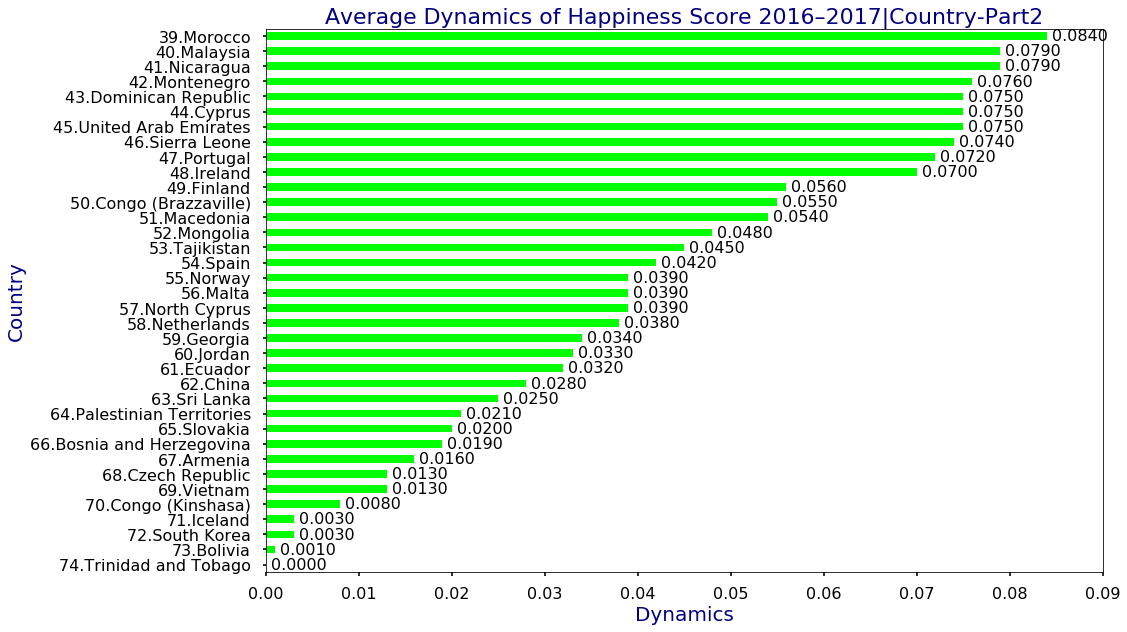

In [55]:
bpdc2 = data_dyn_countryidx['Dynamics'].iloc[76:112].plot(kind='barh', figsize=(15,10), fontsize=16, color='lime')  
##modifying title and labels  
plt.xlim([0, 0.09])  
title_obj = plt.title('Average Dynamics of Happiness Score 2016–2017|Country-Part2', fontsize=22)           
plt.setp(title_obj, color='navy')  
x_obj = plt.xlabel('Dynamics', fontsize=20)  
plt.setp(x_obj, color='navy')  
y_obj = plt.ylabel('Country', fontsize=20)  
plt.setp(y_obj, color='navy')  
  
rects = bpdc2.patches  
for rect in rects:  
    ##get X and Y placement of label from rect.  
    x_value = rect.get_width()  
    y_value = rect.get_y() + rect.get_height() / 2  
  
    ##number of points between bar and label. Change to your liking.  
    space = 5  
    ##vertical alignment for positive values  
    ha = 'left'  
  
    ##if value of bar is negative: Place label left of bar  
    if x_value < 0:  
        ##invert space to place label to the left  
        space *= -1  
        ##horizontally align label at right  
        ha = 'right'  
  
    ##use X value as label and format number with four decimal place  
    label = "{:.4f}".format(x_value)  
  
    ##create annotation  
    plt.annotate(  
        label,                      ##use `label` as label  
        (x_value, y_value),         ##place label at end of the bar  
        xytext=(space, 0),          ##horizontally shift label by `space`  
        textcoords="offset points", ##interpret `xytext` as offset in points  
        va='center',                ##vertically center label  
        ha=ha,  
        fontsize=16)                 
      
plt.show()  
  
##saving plot  
figure = bpdc2.get_figure()      
figure.savefig('hs_dynamics_barplot_country2.png', dpi=450, bbox_inches='tight')  

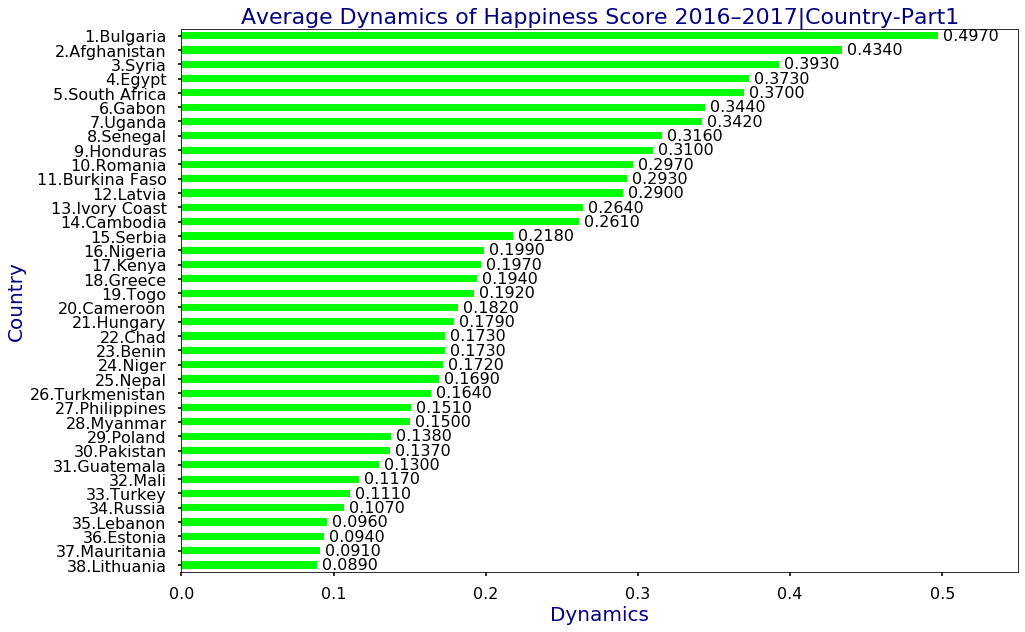

In [56]:
bpdc1 = data_dyn_countryidx['Dynamics'].iloc[112:150].plot(kind='barh', figsize=(15,10), fontsize=16, color='lime')  
##modifying title and labels  
plt.xlim([0, 0.55])  
title_obj = plt.title('Average Dynamics of Happiness Score 2016–2017|Country-Part1', fontsize=22)           
plt.setp(title_obj, color='navy')  
x_obj = plt.xlabel('Dynamics', fontsize=20)  
plt.setp(x_obj, color='navy')  
y_obj = plt.ylabel('Country', fontsize=20)  
plt.setp(y_obj, color='navy')  
  
rects = bpdc1.patches  
for rect in rects:  
    ##get X and Y placement of label from rect.  
    x_value = rect.get_width()  
    y_value = rect.get_y() + rect.get_height() / 2  
  
    ##number of points between bar and label. Change to your liking.  
    space = 5  
    ##vertical alignment for positive values  
    ha = 'left'  
  
    ##if value of bar is negative: Place label left of bar  
    if x_value < 0:  
        ##invert space to place label to the left  
        space *= -1  
        ##horizontally align label at right  
        ha = 'right'  
  
    ##use X value as label and format number with four decimal place  
    label = "{:.4f}".format(x_value)  
  
    ##create annotation  
    plt.annotate(  
        label,                      ##use `label` as label  
        (x_value, y_value),         ##place label at end of the bar  
        xytext=(space, 0),          ##horizontally shift label by `space`  
        textcoords="offset points", ##interpret `xytext` as offset in points  
        va='center',                ##vertically center label  
        ha=ha,  
        fontsize=16)                 
      
plt.show()  
  
##saving plot  
figure = bpdc1.get_figure()      
figure.savefig('hs_dynamics_barplot_country1.png', dpi=450, bbox_inches='tight')  

In [57]:
##counting median an quartiles for 'Happiness Score'  
data_all_bpr = data_all_bpr.round(4) ##rounding data  
data_all_bpr = data_all_bpr.sort_values(by = 'Happiness Score', ascending = False) ##sorting data  
data_all_bpr.reset_index(level=0, inplace=True) ##resetting index  
data_all_bpr.head()  

,Region,Happiness Score
0,Western Europe,7.5300
1,Western Europe,7.5250
2,Western Europe,7.5220
3,Western Europe,7.5190
4,Western Europe,7.4293


In [58]:
##using 'describe' function with 'groupby' for  counting median and quartiles
data_all_bpr.groupby('Region').describe()

Happiness Score                              \
                                          count      mean       std     min   
Region                                                                        
Australia and New Zealand                   2.0  7.302500  0.012445  7.2937   
Central and Eastern Europe                 29.0  5.371183  0.568778  4.2783   
Eastern Asia                                4.0  5.489925  0.506254  4.9120   
Latin America and Caribbean                21.0  6.050929  0.730703  4.0497   
Middle East and Northern Africa            19.0  5.362168  1.031004  3.1790   
North America                               2.0  7.227150  0.219415  7.0720   
Southeastern Asia                           8.0  5.404763  0.942430  3.9647   
Southern Asia                               7.0  4.590829  0.550502  3.5763   
Sub-Saharan Africa                         33.0  4.107479  0.527942  2.9050   
Western Europe                             21.0  6.692995  0.788389  5.0390   

                                                                      
                                      25%      50%       75%     max  
Region                                                                
Australia and New Zealand        7.298100  7.30250  7.306900  7.3113  
Central and Eastern Europe       5.098000  5.49230  5.845000  6.5700  
Eastern Asia                     5.142475  5.55250  5.899950  5.9427  
Latin America and Caribbean      5.760700  6.06700  6.607700  7.1307  
Middle East and Northern Africa  4.739150  5.27700  6.150650  7.2527  
North America                    7.149575  7.22715  7.304725  7.3823  
Southeastern Asia                4.977675  5.29285  6.077500  6.7030  
Southern Asia                    4.401650  4.64830  4.954800  5.1983  
Sub-Saharan Africa               3.788700  4.13930  4.356300  5.5847  
Western Europe                   6.364300  6.89830  7.364700  7.5300

In [59]:
##counting median an quartiles for dynamics of 'Happiness Score'  
data_dyn2016bp = data2016_df[['Country', 'Happiness Score', 'Region']] ##new data frame  
data_dyn2017bp = data2017_df_reg[['Country', 'Happiness.Score', 'Region']] ##new data frame  
##merging data with 'merg' method   
data_dynbp = pd.merge(data_dyn2017bp, data_dyn2016bp, how = 'inner', on = ('Country', 'Region'))  
##inspecting data  
data_dynbp.info()  
data_dynbp.head()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 4 columns):
Country            150 non-null object
Happiness.Score    150 non-null float64
Region             150 non-null object
Happiness Score    150 non-null float64
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


,Country,Happiness.Score,Region,Happiness Score
0,Norway,7.537,Western Europe,7.498
1,Denmark,7.522,Western Europe,7.526
2,Iceland,7.504,Western Europe,7.501
3,Switzerland,7.494,Western Europe,7.509
4,Finland,7.469,Western Europe,7.413


In [60]:
##using 'describe' function with 'groupby' for  counting median and quartiles  
data_dynbp['Dynamics'] = data_dynbp['Happiness.Score'] - data_dynbp['Happiness Score'] ##counting dynamics  
data_dynbp_fin = data_dynbp[['Region', 'Dynamics']] ##new data frame  
data_dynbp_fin.groupby('Region').describe()  

Dynamics                                      \
                                   count      mean       std    min      25%   
Region                                                                         
Australia and New Zealand            2.0 -0.024500  0.006364 -0.029 -0.02675   
Central and Eastern Europe          29.0  0.039241  0.163727 -0.233 -0.05700   
Eastern Asia                         4.0  0.019500  0.022927 -0.001  0.00200   
Latin America and Caribbean         22.0 -0.093727  0.227519 -0.834 -0.18025   
Middle East and Northern Africa     19.0 -0.016368  0.197255 -0.483 -0.12600   
North America                        2.0 -0.099500  0.016263 -0.111 -0.10525   
Southeastern Asia                    8.0  0.048125  0.138563 -0.167 -0.05050   
Southern Asia                        7.0  0.065143  0.204115 -0.185 -0.06200   
Sub-Saharan Africa                  36.0  0.031778  0.201009 -0.318 -0.09175   
Western Europe                      21.0  0.018048  0.061410 -0.113 -0.01300   

                                                         
                                    50%      75%    max  
Region                                                   
Australia and New Zealand       -0.0245 -0.02225 -0.020  
Central and Eastern Europe       0.0200  0.10700  0.497  
Eastern Asia                     0.0155  0.03300  0.048  
Latin America and Caribbean     -0.0480  0.00075  0.310  
Middle East and Northern Africa -0.0350  0.07950  0.393  
North America                   -0.0995 -0.09375 -0.088  
Southeastern Asia                0.0460  0.15025  0.261  
Southern Asia                    0.0250  0.15300  0.434  
Sub-Saharan Africa               0.0040  0.18450  0.370  
Western Europe                   0.0030  0.04200  0.194

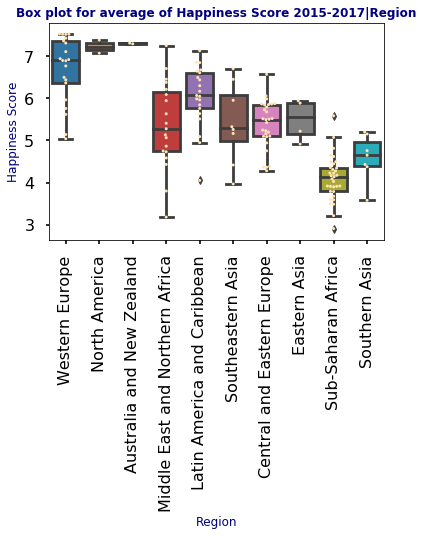

In [61]:
##boxplot for 'Happiness Score' in Regions with methods 'boxplot' and 'swarmplot'  
## Usual boxplot  
bp1 = sns.boxplot(x='Region', y='Happiness Score', data=data_all_bpr)  
## Add jitter with the swarmplot function.  
bp1 = sns.swarmplot(x='Region', y='Happiness Score', data=data_all_bpr, color='moccasin', size=3)  
  
##modifying title and labels  
bp1.set_title('Box plot for average of Happiness Score 2015-2017|Region', fontsize=12, color='navy', fontweight='bold')  
x_obj = plt.xlabel('Region', fontsize=12)  
plt.setp(x_obj, color='navy')  
y_obj = plt.ylabel('Happiness Score', fontsize=12)  
plt.setp(y_obj, color='navy')  
  
##changing rotation of labels  
for item in bp1.get_xticklabels():  
    item.set_rotation(90)  
      
plt.show()  
##saving plot with optimal size  
figure = bp1.get_figure()   
figure.savefig('bphs.png', dpi=900, bbox_inches='tight')  

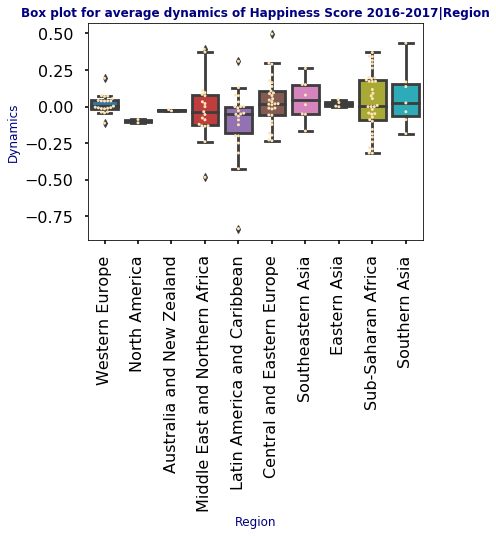

In [62]:
##boxplot for 'Happiness Score' in Regions with methods 'boxplot' and 'swarmplot'  
## Usual boxplot  
bp2 = sns.boxplot(x='Region', y='Dynamics', data=data_dynbp_fin)  
## Add jitter with the swarmplot function.  
bp2 = sns.swarmplot(x='Region', y='Dynamics', data=data_dynbp_fin, color='moccasin', size=3)  
  
##modifying title and labels  
bp2.set_title('Box plot for average dynamics of Happiness Score 2016-2017|Region', fontsize=12, color='navy', fontweight='bold')  
x_obj = plt.xlabel('Region', fontsize=12)  
plt.setp(x_obj, color='navy')  
y_obj = plt.ylabel('Dynamics', fontsize=12)  
plt.setp(y_obj, color='navy')  
  
##changing rotation of labels  
for item in bp2.get_xticklabels():  
    item.set_rotation(90)  
      
plt.show()  
##saving plot with optimal size  
figure = bp2.get_figure()   
figure.savefig('bpdhs.png', dpi=900, bbox_inches='tight')  